# State and Process Plots

### Some states

In [1]:
# python related things
import numpy as np
from matplotlib import pyplot as plt

# quantum related things
from pyquil.gate_matrices import X, Y, Z, H, CNOT, CZ
from forest.benchmarking.superoperator_tools import *
from forest.benchmarking.utils import n_qubit_pauli_basis


## Define some quantum states

Single qubit quantum states

In [2]:
ZERO = np.array([[1, 0], [0, 0]])
ONE = np.array([[0, 0], [0, 1]])

plus = np.array([[1], [1]]) / np.sqrt(2)
minus = np.array([[1], [-1]]) / np.sqrt(2)
PLUS = plus @ plus.T.conj()
MINUS = minus @ minus.T.conj()

plusy = np.array([[1], [1j]]) / np.sqrt(2)
minusy = np.array([[1], [-1j]]) / np.sqrt(2)
PLUSy = plusy @ plusy.T.conj()
MINUSy = minusy @ minusy.T.conj()

MIXED = np.eye(2)/2

single_qubit_states = [('0',ZERO),('1',ONE),('+',PLUS),('-',MINUS),('+i',PLUSy),('-i',MINUSy)]

Two qubit quantum states

In [3]:
P00 = np.kron(ZERO, ZERO)
P01 = np.kron(ZERO, ONE)
P10 = np.kron(ONE, ZERO)
P11 = np.kron(ONE, ONE)

bell = 1/np.sqrt(2) * np.array([[1, 0, 0, 1]])
BELL = np.outer(bell, bell)

two_qubit_states = [('00',P00), ('01',P01), ('10',P10), ('11',P11),('BELL',BELL)]

## Two types of Pauli Representation of a quantum state

In [4]:
# convert to pauli basis
n_qubits = 1
pl_basis_oneq = n_qubit_pauli_basis(n_qubits)
c2p_oneq = computational2pauli_basis_matrix(2*n_qubits)
oneq_states_pl = [ (state[0], np.real(c2p_oneq@vec(state[1]))) for state in single_qubit_states]

n_qubits = 2
pl_basis_twoq = n_qubit_pauli_basis(n_qubits)
c2p_twoq = computational2pauli_basis_matrix(2*n_qubits)
twoq_states_pl = [ (state[0], np.real(c2p_twoq@vec(state[1]))) for state in two_qubit_states]

In [5]:
from forest.benchmarking.plotting.state_process import plot_pauli_rep_of_state, plot_pauli_bar_rep_of_state

### Single Qubit states

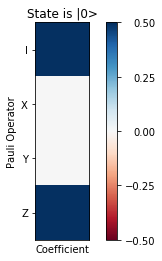

In [6]:
# can plot vertically
fig, ax = plt.subplots(1)
plot_pauli_rep_of_state(oneq_states_pl[0][1], ax, pl_basis_oneq.labels, 'State is |0>')

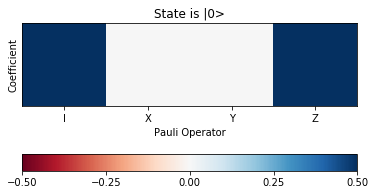

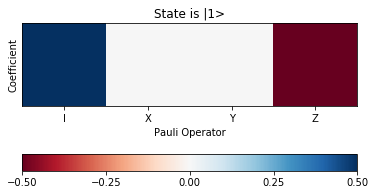

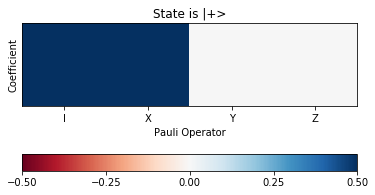

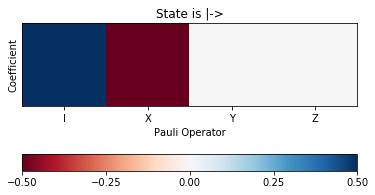

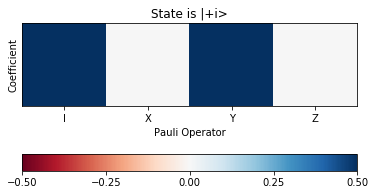

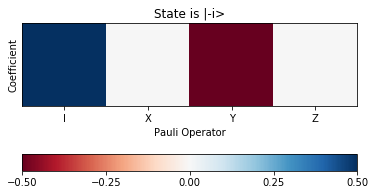

In [7]:
# or can plot horizontally
for state in oneq_states_pl:
    fig, ax = plt.subplots(1)
    plot_pauli_rep_of_state(state[1].transpose(), ax, pl_basis_oneq.labels, 'State is |'+state[0]+'>')

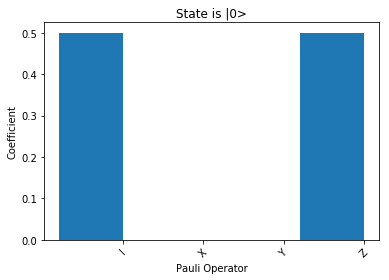

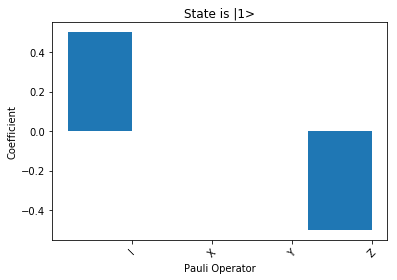

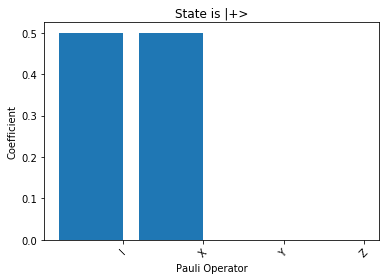

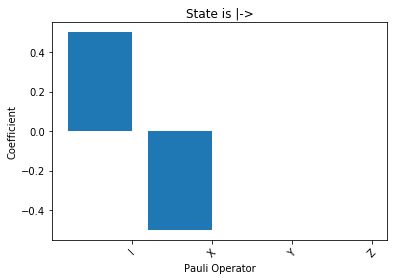

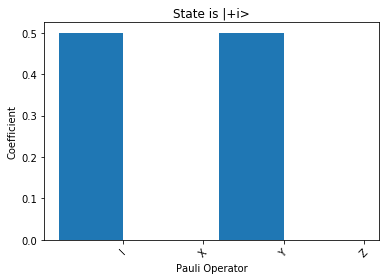

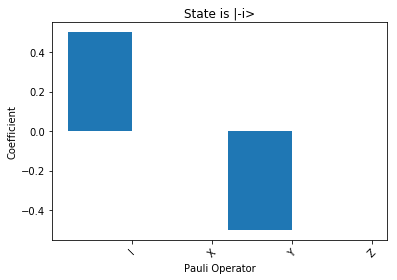

In [8]:
for state in oneq_states_pl:
    fig, ax = plt.subplots(1)
    plot_pauli_bar_rep_of_state(state[1].flatten(), ax, pl_basis_oneq.labels, 'State is |'+state[0]+'>')

### Two qubit states

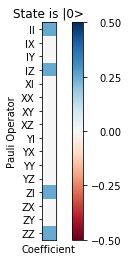

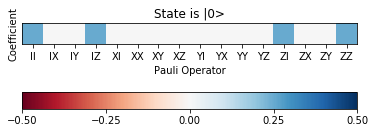

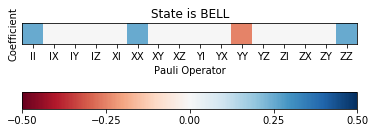

In [9]:
# can plot vertically 
fig, ax = plt.subplots(1)
plot_pauli_rep_of_state(twoq_states_pl[0][1], ax, pl_basis_twoq.labels, 'State is |0>')
# can plot horizontially
fig, ax = plt.subplots(1)
plot_pauli_rep_of_state(twoq_states_pl[0][1].transpose(), ax, pl_basis_twoq.labels, 'State is |0>')
fig, ax = plt.subplots(1)
plot_pauli_rep_of_state(twoq_states_pl[-1][1].transpose(), ax, pl_basis_twoq.labels, 'State is BELL')

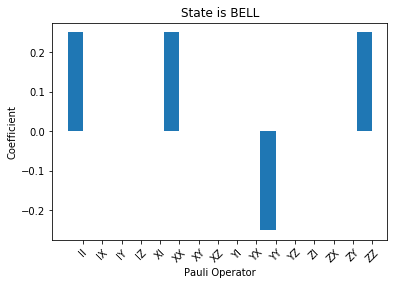

In [10]:
# Also bar plots 
fig, ax = plt.subplots(1)
plot_pauli_bar_rep_of_state(twoq_states_pl[-1][1].flatten(), ax, pl_basis_twoq.labels, 'State is BELL')

# Plot a Quantum Process as a Pauli Transfer Matrix

In [11]:
Xpl = kraus2pauli_liouville(X)
Hpl = kraus2pauli_liouville(H)
from forest.benchmarking.plotting.state_process import plot_pauli_transfer_matrix

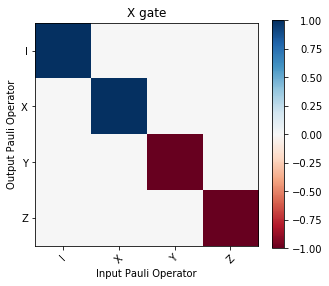

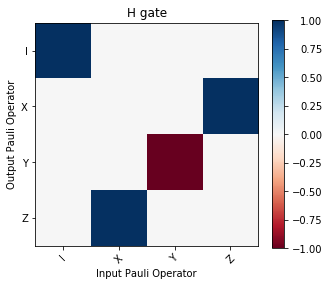

In [12]:
f, (ax1) = plt.subplots(1, 1, figsize=(5, 4.2))
plot_pauli_transfer_matrix(np.real(Xpl), ax1, pl_basis_oneq.labels, 'X gate')

f, (ax1) = plt.subplots(1, 1, figsize=(5, 4.2))
plot_pauli_transfer_matrix(np.real(Hpl), ax1, pl_basis_oneq.labels, 'H gate')

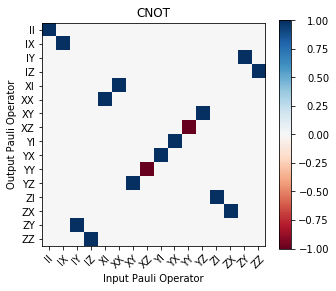

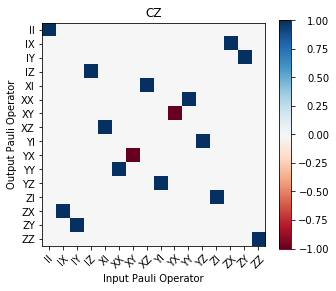

In [13]:
CNOTpl = kraus2pauli_liouville(CNOT)
CZpl = kraus2pauli_liouville(CZ)

f, (ax1) = plt.subplots(1, 1, figsize=(5, 4.2))
plot_pauli_transfer_matrix(np.real(CNOTpl), ax1, pl_basis_twoq.labels, 'CNOT')
f, (ax1) = plt.subplots(1, 1, figsize=(5, 4.2))
plot_pauli_transfer_matrix(np.real(CZpl), ax1, pl_basis_twoq.labels, 'CZ')

# Hinton Plots for states and processes

The warning here is the `hinton_real` function only works for plotting a real matrix so the user has to be careful. It will take the absolute value of complex numbers.

## Visualize a real state in the computational basis

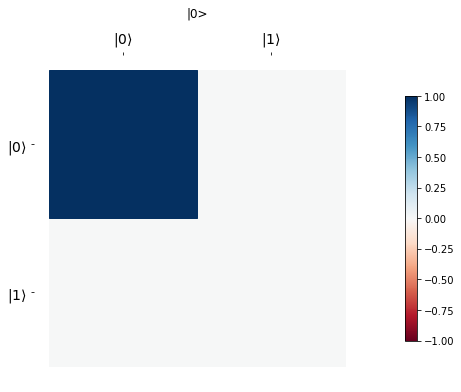

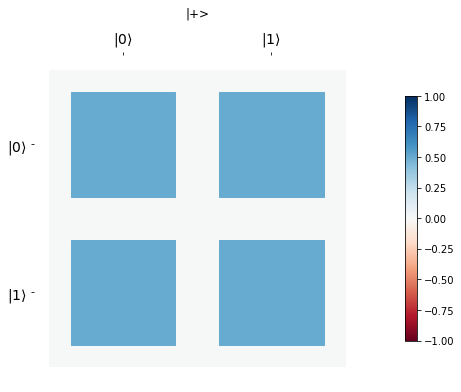

In [14]:
from forest.benchmarking.utils import n_qubit_computational_basis
from forest.benchmarking.plotting.hinton import hinton_real
oneq = n_qubit_computational_basis(1)
oneq_latex_labels = [r'$|{}\rangle$'.format(''.join(j)) for j in oneq.labels]

_ = hinton_real(ZERO, max_weight=1.0, xlabels=oneq_latex_labels, ylabels=oneq_latex_labels, ax=None, title='|0>')
_ = hinton_real(PLUS, max_weight=1.0, xlabels=oneq_latex_labels, ylabels=oneq_latex_labels, ax=None, title='|+>')

## Visualize a Process Pauli basis
The Pauli representation is real so we can plot any process

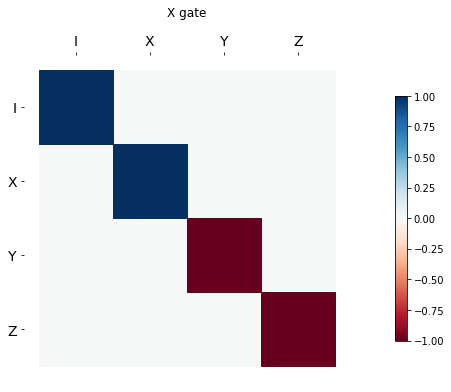

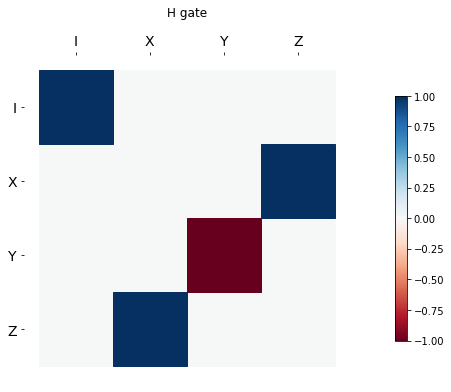

In [15]:
_ = hinton_real(Xpl, max_weight=1.0, xlabels=pl_basis_oneq.labels, ylabels=pl_basis_oneq.labels, ax=None, title='X gate')
_ = hinton_real(Hpl, max_weight=1.0, xlabels=pl_basis_oneq.labels, ylabels=pl_basis_oneq.labels, ax=None, title='H gate')

So far things look the same as the `plot_pauli_transfer_matrix` but we can plot using the traditional Hinton diagram colors, now the size of the squares makes a difference.

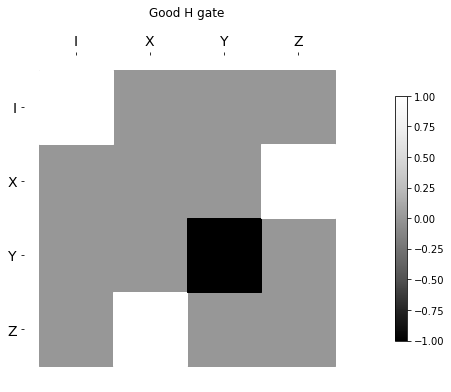

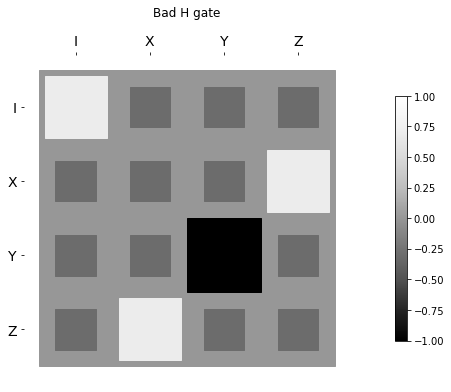

In [21]:
from matplotlib import cm
_ = hinton_real(Hpl, max_weight=1.0, xlabels=pl_basis_oneq.labels, ylabels=pl_basis_oneq.labels,cmap = cm.Greys_r, ax=None, title='Good H gate')
_ = hinton_real(Hpl-0.3, max_weight=1.0, xlabels=pl_basis_oneq.labels, ylabels=pl_basis_oneq.labels, cmap = cm.Greys_r, ax=None, title='Bad H gate')